Loading data from /Users/amonsisowath/VSC/Uni/Sing2425/CS3244/Assignment1/scripts/lib/../data/Resale Flat Prices (Based on Approval Date), 1990 - 1999.csv...
Loading data from /Users/amonsisowath/VSC/Uni/Sing2425/CS3244/Assignment1/scripts/lib/../data/Resale Flat Prices (Based on Approval Date), 2000 - Feb 2012.csv...
Loading data from /Users/amonsisowath/VSC/Uni/Sing2425/CS3244/Assignment1/scripts/lib/../data/Resale Flat Prices (Based on Registration Date), From Mar 2012 to Dec 2014.csv...
Loading data from /Users/amonsisowath/VSC/Uni/Sing2425/CS3244/Assignment1/scripts/lib/../data/Resale Flat Prices (Based on Registration Date), From Jan 2015 to Dec 2016.csv...
Loading data from /Users/amonsisowath/VSC/Uni/Sing2425/CS3244/Assignment1/scripts/lib/../data/Resale flat prices based on registration date from Jan-2017 onwards.csv...
Combined dataset shape: (948962, 11)
Features shape: (948962, 1)
Target shape: (948962,)
Selected features: block
Top 5 blocks by average price:
     block    

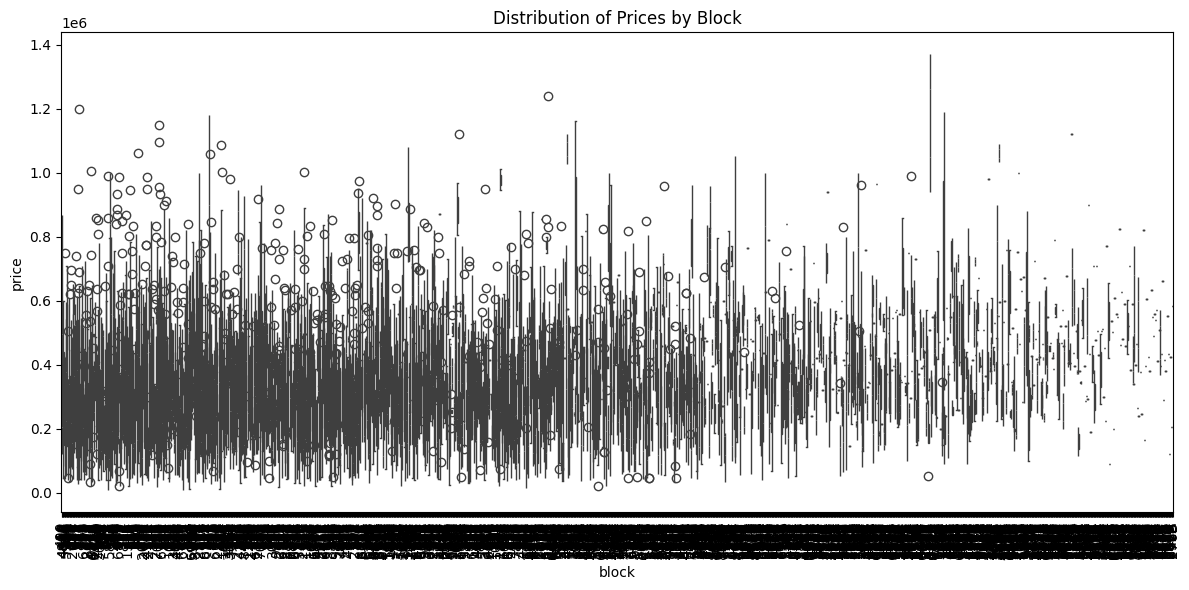

In [19]:
# Let's analyze the 'block' feature and its relationship with housing prices
from lib.utils import load_all_resale_data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the data with just the block feature
X, y = load_all_resale_data(include_features=['block'])

# Convert to DataFrame for easier analysis
df = pd.DataFrame(X, columns=['block'])
df['price'] = y

# Basic statistics of prices grouped by block
block_stats = df.groupby('block')['price'].agg(['mean', 'median', 'std', 'count']).reset_index()
block_stats = block_stats.sort_values('mean', ascending=False)

# Display top and bottom blocks by average price
print("Top 5 blocks by average price:")
print(block_stats.head(5))
print("\nBottom 5 blocks by average price:")
print(block_stats.tail(5))

# Visualize the distribution of prices by block
plt.figure(figsize=(12, 6))
sns.boxplot(x='block', y='price', data=df.sample(min(10000, len(df))))
plt.xticks(rotation=90)
plt.title('Distribution of Prices by Block')
plt.tight_layout()
plt.show()

/var/folders/q5/fvpf7hdn6856crg46p1mkjrm0000gn/T/ipykernel_9433/3278222849.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='block', y='price', data=top_df, palette='viridis')


Block Lowest std count      2733.000000
mean     122463.718797
std       40725.752812
min        5798.275606
25%       93503.038086
50%      117041.846601
75%      146620.890831
max      451524.755000
Name: price, dtype: float64
Block Std Mean: 122463.71879693282
2737 unique blocks


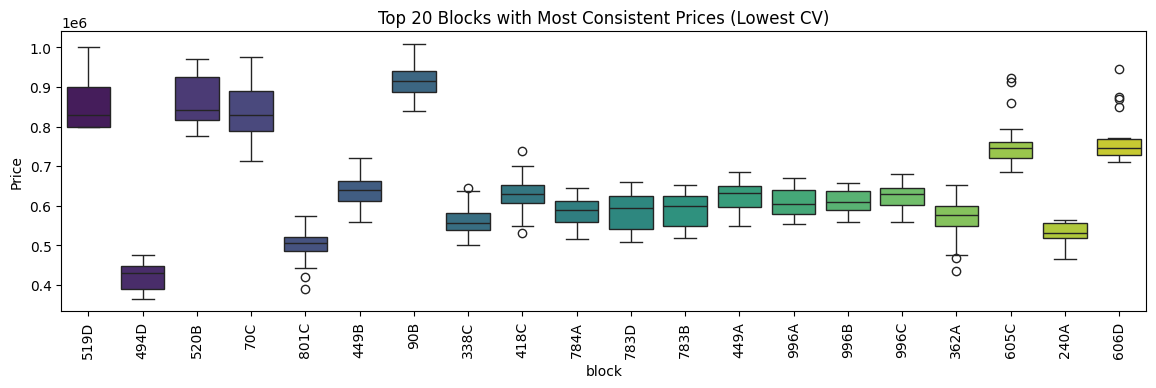

In [25]:
block_cv = df.groupby('block')['price'].agg(['mean', 'std']).eval('cv = std / mean').sort_values('cv')
block_cv['count'] = df.groupby('block')['price'].count()

min_samples = 10
block_cv_filtered = block_cv[block_cv['count'] >= min_samples]

plt.figure(figsize=(14, 8))
top_consistent_blocks = block_cv_filtered.sort_values('cv').head(20).index
top_df = df[df['block'].isin(top_consistent_blocks)].copy()

plt.subplot(2, 1, 1)
sns.boxplot(x='block', y='price', data=top_df, palette='viridis')
plt.xticks(rotation=90)
plt.title('Top 20 Blocks with Most Consistent Prices (Lowest CV)')
plt.ylabel('Price')

# calculate the average varience of every block
block_mean = df.groupby('block')['price'].mean()
block_var = df.groupby('block')['price'].var()
block_std = df.groupby('block')['price'].std()


print("Block Lowest std", block_std.describe())
print("Block Std Mean:", block_std.mean())
print(df['block'].unique().shape[0], "unique blocks")

<>:3: SyntaxWarning: invalid escape sequence '\d'
<>:3: SyntaxWarning: invalid escape sequence '\d'
/var/folders/q5/fvpf7hdn6856crg46p1mkjrm0000gn/T/ipykernel_9433/3520170395.py:3: SyntaxWarning: invalid escape sequence '\d'
  df['block_num'] = df['block'].str.extract('(\d+)').astype(int)


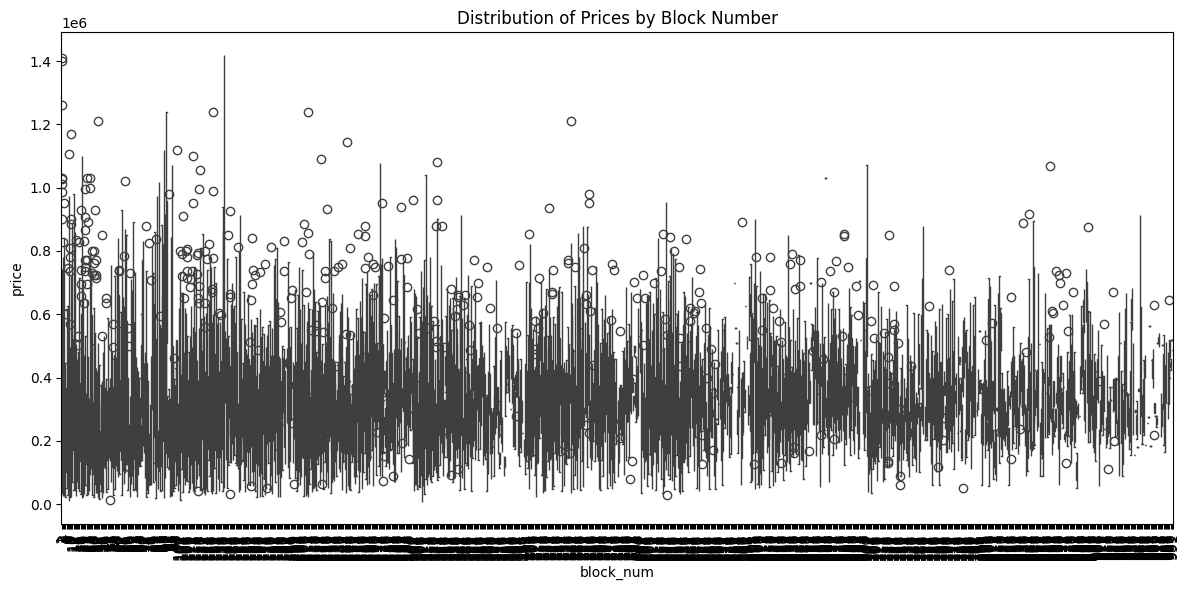

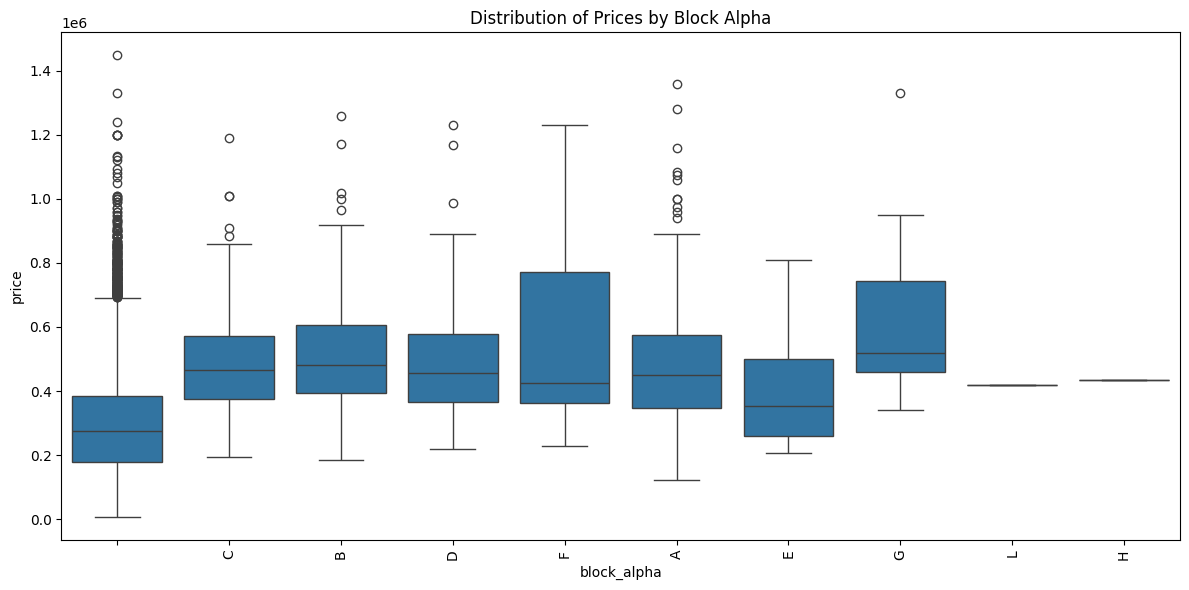

In [ ]:
# convert the block into numeric by dropping the letters. Convert the letters into second feature

df['block_num'] = df['block'].str.extract('(\d+)').astype(int)
df['block_alpha'] = df['block'].str.extract('([A-Z]+)')
df['block_alpha'] = df['block_alpha'].fillna('')
df['block_alpha'] = df['block_alpha'].apply(lambda x: ''.join(sorted(set(x))))

# show a graph of the average price by block number
plt.figure(figsize=(12, 6))
sns.boxplot(x='block_num', y='price', data=df.sample(min(10000, len(df))))
plt.xticks(rotation=90)
plt.title('Distribution of Prices by Block Number')
plt.tight_layout() 
plt.show()


# show the block alpha
plt.figure(figsize=(12, 6))
sns.boxplot(x='block_alpha', y='price', data=df.sample(min(10000, len(df))))
plt.xticks(rotation=90)
plt.title('Distribution of Prices by Block Alpha')
plt.tight_layout()
plt.show()

Block Lowest std count       988.000000
mean     154303.691923
std       37926.768277
min       31567.417334
25%      129304.727663
50%      152110.677768
75%      173015.661061
max      322801.128066
Name: price, dtype: float64
Block Std Mean: 154303.69192252232
988 unique blocks


/var/folders/q5/fvpf7hdn6856crg46p1mkjrm0000gn/T/ipykernel_9433/378414049.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='block_num', y='price', data=top_df, palette='viridis')


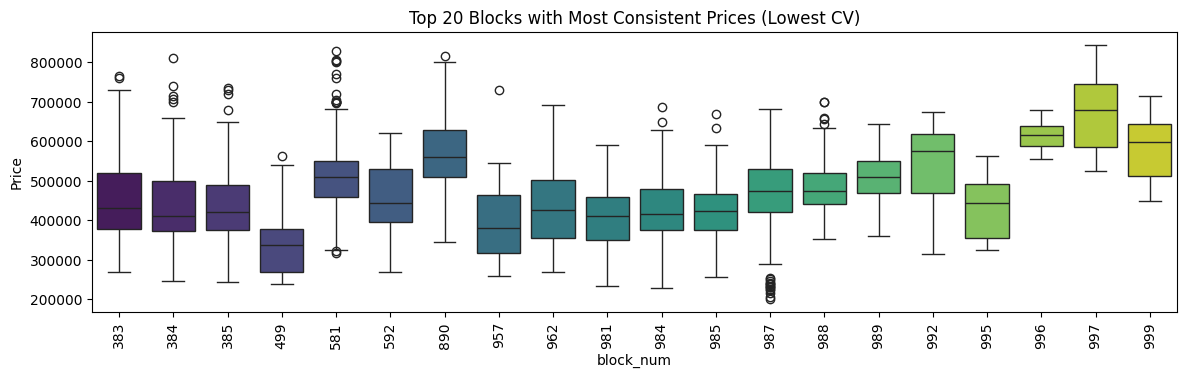

In [26]:
block_cv = df.groupby('block_num')['price'].agg(['mean', 'std']).eval('cv = std / mean').sort_values('cv')
block_cv['count'] = df.groupby('block_num')['price'].count()

min_samples = 10
block_cv_filtered = block_cv[block_cv['count'] >= min_samples]

plt.figure(figsize=(14, 8))
top_consistent_blocks = block_cv_filtered.sort_values('cv').head(20).index
top_df = df[df['block_num'].isin(top_consistent_blocks)].copy()

plt.subplot(2, 1, 1)
sns.boxplot(x='block_num', y='price', data=top_df, palette='viridis')
plt.xticks(rotation=90)
plt.title('Top 20 Blocks with Most Consistent Prices (Lowest CV)')
plt.ylabel('Price')

# calculate the average varience of every block
block_mean = df.groupby('block_num')['price'].mean()
block_var = df.groupby('block_num')['price'].var()
block_std = df.groupby('block_num')['price'].std()


print("Block Lowest std", block_std.describe())
print("Block Std Mean:", block_std.mean())
print(df['block_num'].unique().shape[0], "unique blocks")

Using the block in order to predict the price has a mean std of 122463.

With the following std distriubution:

25% 93503.038086

50% 117041.846601

75% 146620.890831

Reducing the Information to the block number and dropping the alpha will reduce the feature set from 2737 to 988 but to the cost of: 

25% 129304.727663

50% 152110.677768

75% 173015.661061

But will also improve the std of the std in the blocks from 40725.752812 to 37926.768277

=> Valid for feature reduction as it only reduces the std by a bit